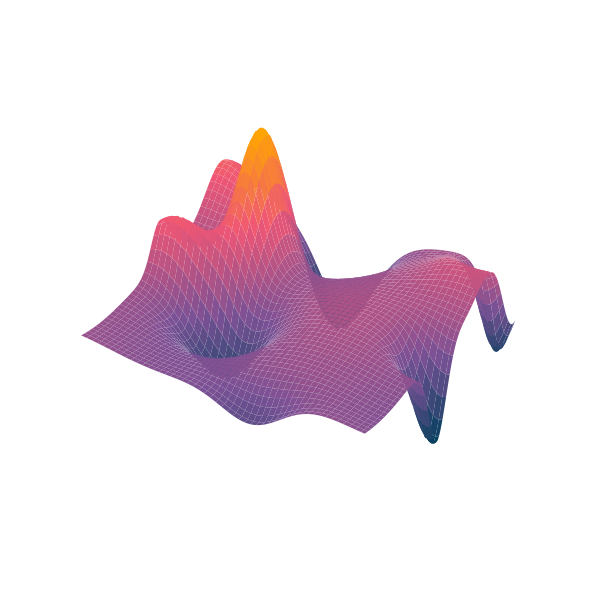

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  (just needed for 3D projection)

def random_fitness_landscape(
    grid_size=100,
    xlim=(-3, 3),
    ylim=(-3, 3),
    n_peaks=8,
    seed=None
):
    """
    Generate a random 3D fitness landscape-like surface as a sum of Gaussian bumps.
    Returns X, Y, Z grids.
    """
    if seed is not None:
        np.random.seed(seed)

    # Make grid
    x = np.linspace(xlim[0], xlim[1], grid_size)
    y = np.linspace(ylim[0], ylim[1], grid_size)
    X, Y = np.meshgrid(x, y)

    # Initialize surface
    Z = np.zeros_like(X)

    # Add random Gaussian bumps
    for _ in range(n_peaks):
        # Random center for this peak
        x0 = np.random.uniform(*xlim)
        y0 = np.random.uniform(*ylim)

        # Random amplitude (height / depth)
        amp = np.random.uniform(0.5, 1.5) * np.random.choice([-1, 1])

        # Random width (controls “smoothness” of peak)
        sx = np.random.uniform(0.4, 1.2)
        sy = np.random.uniform(0.4, 1.2)

        # Gaussian bump
        bump = amp * np.exp(-(((X - x0)**2) / (2 * sx**2) +
                              ((Y - y0)**2) / (2 * sy**2)))
        Z += bump

    # Optional: add a little smooth baseline trend
    Z += 0.1 * (np.sin(X) + np.cos(Y))

    return X, Y, Z

if __name__ == "__main__":
    X, Y, Z = random_fitness_landscape(
        grid_size=150,
        xlim=(-4, 4),
        ylim=(-4, 4),
        n_peaks=10,
        seed=42
    )

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

from matplotlib.colors import LinearSegmentedColormap

colors = ["#003f5c", "#7a5195", "#ef5675", "#ffa600"]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

surf = ax.plot_surface(X, Y, Z, cmap=my_cmap)

ax.set_axis_off()

plt.tight_layout()

plt.savefig('/Users/asapp/Documents/VAST/r4_figs/landscape_diagram.pdf', format='pdf')

plt.show()

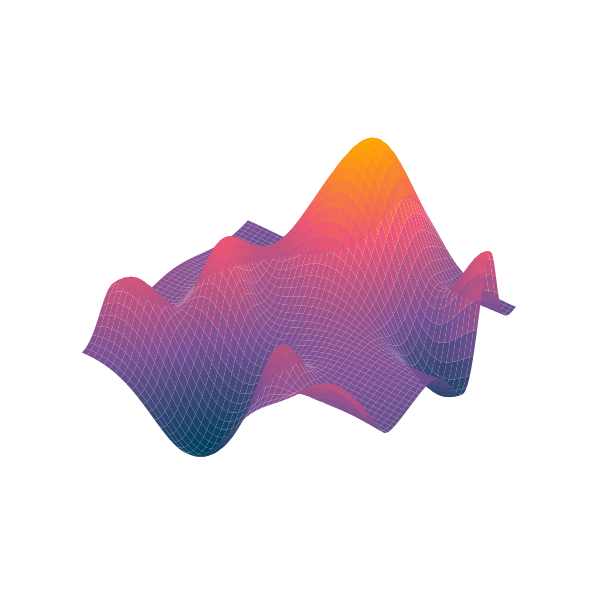

In [31]:
if __name__ == "__main__":
    X, Y, Z = random_fitness_landscape(
        grid_size=150,
        xlim=(-4, 4),
        ylim=(-4, 4),
        n_peaks=10,
        seed=33
    )

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

from matplotlib.colors import LinearSegmentedColormap

colors = ["#003f5c", "#7a5195", "#ef5675", "#ffa600"]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

surf = ax.plot_surface(X, Y, Z, cmap=my_cmap)

ax.set_axis_off()

plt.tight_layout()

plt.savefig('/Users/asapp/Documents/VAST/r4_figs/landscape_diagram_2.pdf', format='pdf', transparent=True)

plt.show()

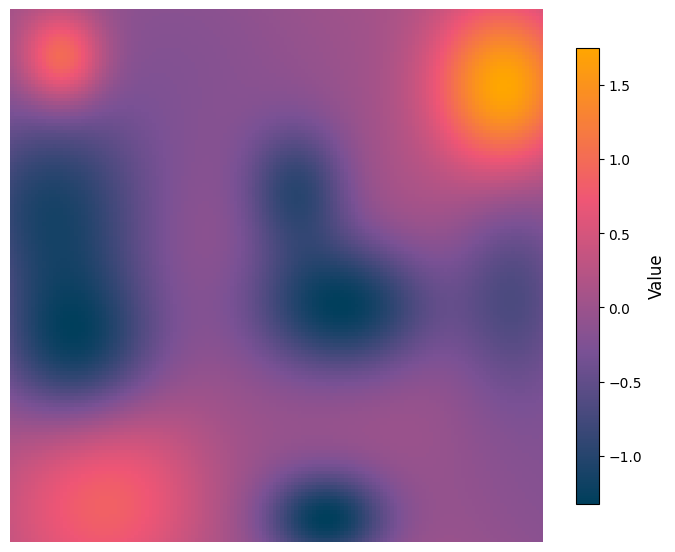

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# --- same colormap you already defined ---
colors = ["#003f5c", "#7a5195", "#ef5675", "#ffa600"]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

def random_heatmap(
    grid_size=150,
    xlim=(-4, 4),
    ylim=(-4, 4),
    n_peaks=10,
    seed=None
):
    """
    Generate a random 2D fitness-landscape-like heatmap using the
    same Gaussian bump logic as the 3D version.
    """
    if seed is not None:
        np.random.seed(seed)

    x = np.linspace(xlim[0], xlim[1], grid_size)
    y = np.linspace(ylim[0], ylim[1], grid_size)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)

    # Add Gaussian bumps
    for _ in range(n_peaks):
        x0 = np.random.uniform(*xlim)
        y0 = np.random.uniform(*ylim)
        amp = np.random.uniform(0.5, 1.5) * np.random.choice([-1, 1])
        sx = np.random.uniform(0.4, 1.2)
        sy = np.random.uniform(0.4, 1.2)

        bump = amp * np.exp(-(((X - x0)**2)/(2*sx**2) +
                              ((Y - y0)**2)/(2*sy**2)))
        Z += bump

    Z += 0.1 * (np.sin(X) + np.cos(Y))
    return X, Y, Z

# --- generate heatmap ---
X2, Y2, Z2 = random_heatmap(seed=37)

fig, ax = plt.subplots(figsize=(7, 6))

im = ax.imshow(
    Z2,
    cmap=my_cmap,
    origin="lower",
    extent=[X2.min(), X2.max(), Y2.min(), Y2.max()]
)

ax.set_axis_off()

# --- add colorbar (legend for values) ---
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label("Value", fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('/Users/asapp/Documents/VAST/r4_figs/landscape_heatmap_3.pdf',
            format='pdf', bbox_inches='tight')
plt.show()


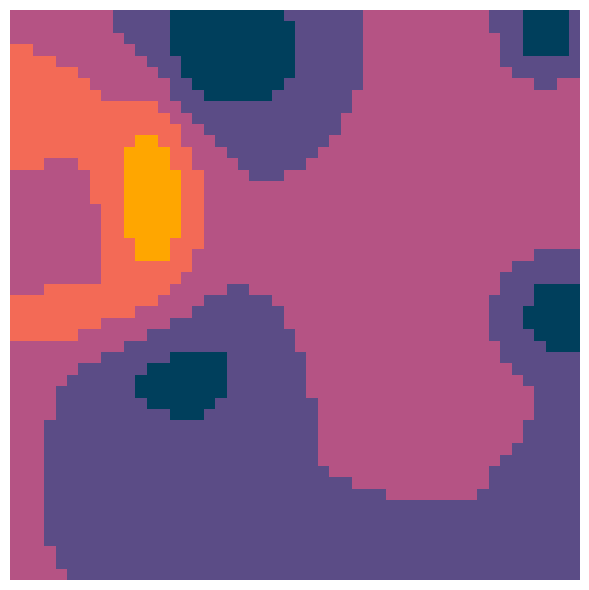

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

# --- original palette reversed ---
colors = ["#ffa600", "#ef5675", "#7a5195", "#003f5c"]  # yellow → pink → purple → dark blue
my_cmap = LinearSegmentedColormap.from_list("my_cmap_reversed", colors)

# --- generate data ---
X2, Y2, Z2 = random_heatmap(grid_size=50, seed=42)

fig, ax = plt.subplots(figsize=(7, 6))

# --- make Z high = dark purple (flip values directly) ---
Z2_flipped = np.max(Z2) - (Z2 - np.min(Z2))  # reflect values so max → min

# --- discretize ---
n_bins = 5
bounds = np.linspace(Z2_flipped.min(), Z2_flipped.max(), n_bins + 1)
norm = BoundaryNorm(bounds, ncolors=my_cmap.N)

im = ax.imshow(
    Z2_flipped,
    cmap=my_cmap,
    norm=norm,
    origin="lower",
    interpolation="nearest",
    extent=[X2.min(), X2.max(), Y2.min(), Y2.max()],
)

# --- add gridlines ---
ax.set_xticks(np.linspace(X2.min(), X2.max(), Z2.shape[1] + 1))
ax.set_yticks(np.linspace(Y2.min(), Y2.max(), Z2.shape[0] + 1))
ax.grid(color="white", linewidth=0.5)

ax.set_axis_off()
plt.tight_layout()

plt.savefig(
    '/Users/asapp/Documents/VAST/r4_figs/landscape_heatmap_discrete_reversed.pdf',
    format='pdf',
    bbox_inches='tight'
)

plt.show()


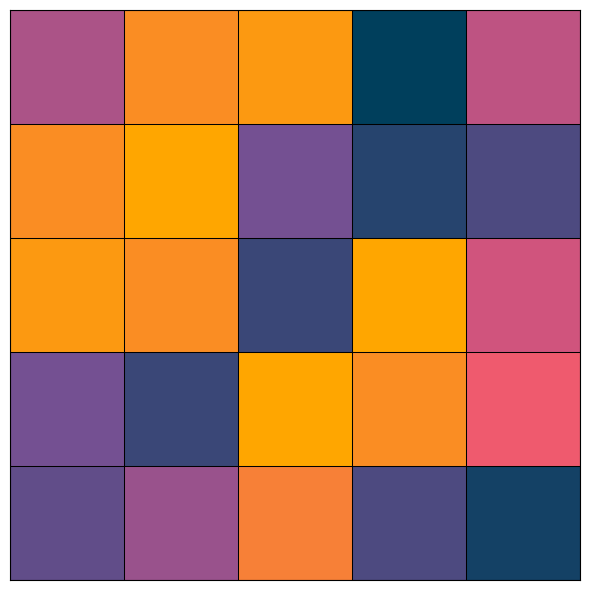

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

# --- reversed palette (yellow low → dark high) ---
colors = ["#ffa600", "#ef5675", "#7a5195", "#003f5c"]
my_cmap = LinearSegmentedColormap.from_list("my_cmap_reversed", colors)

# --- generate a 5x5 grid of random values ---
Z = np.random.rand(5, 5)   # values in [0, 1]

# --- make Z high = dark colors and low = yellow ---
Z_flipped = 1 - Z  # reflect so 1→dark, 0→yellow

fig, ax = plt.subplots(figsize=(6, 6))

# --- discrete bins ---
n_bins = 20
bounds = np.linspace(Z_flipped.min(), Z_flipped.max(), n_bins + 1)
norm = BoundaryNorm(bounds, ncolors=my_cmap.N)

# --- draw the grid ---
im = ax.imshow(
    Z_flipped,
    cmap=my_cmap,
    norm=norm,
    origin="lower",
    interpolation="nearest",
    extent=[0, 5, 0, 5]   # ensures clean 5×5 axes
)

# --- explicit gridlines around every cell ---
ax.set_xticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 6, 1))
ax.grid(color="black", linewidth=0.75)

# ensure gridlines appear on top
ax.set_axisbelow(False)

# optional: remove axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0)

plt.tight_layout()
plt.savefig(
    '/Users/asapp/Documents/VAST/r4_figs/landscape_5x5_grid.pdf',
    format='pdf',
    bbox_inches='tight'
)
plt.show()


In [50]:
data_dir = "/Users/asapp/Documents/VAST/sim_results/absfit"  

font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

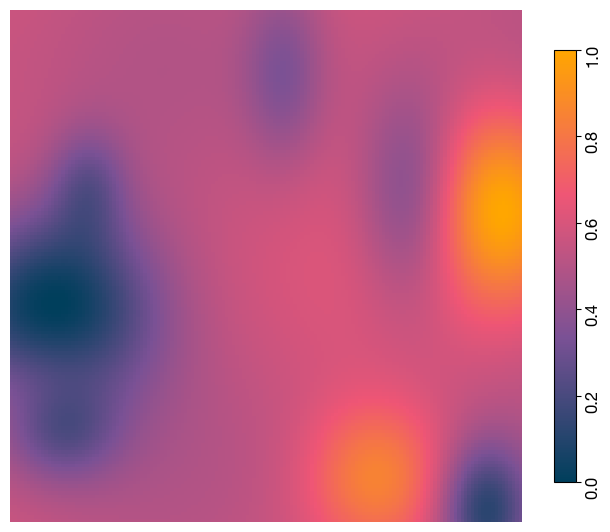

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# --- same palette you used originally ---
colors = ["#003f5c", "#7a5195","#ef5675",     "#ffa600"]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

# --- generate the raw landscape ---
X2, Y2, Z2 = random_heatmap(seed=46)

# --- normalize Z2 to probabilities in [0, 1] ---
Z_min, Z_max = np.min(Z2), np.max(Z2)
Z_prob = (Z2 - Z_min) / (Z_max - Z_min)

# optional: print to verify min/max
# print(Z_prob.min(), Z_prob.max())  # should be 0.0, 1.0

fig, ax = plt.subplots(figsize=(7, 6))

# --- draw heatmap with probability-scaled values ---
im = ax.imshow(
    Z_prob,
    cmap=my_cmap,
    origin="lower",
    extent=[X2.min(), X2.max(), Y2.min(), Y2.max()]
)

ax.set_axis_off()

# --- add colorbar showing 0–1 probability scale ---
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.tick_params(labelsize=12)

# --- rotate labels ---
for tick in cbar.ax.get_yticklabels():
    tick.set_rotation(90)   # change to 90 if you prefer

plt.tight_layout()

plt.savefig(
    '/Users/asapp/Documents/VAST/r4_figs/landscape_heatmap_final_3.pdf',
    format='pdf',
    bbox_inches='tight'
)

plt.show()
